In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [21]:
def load_data():
    # Load dataset from your path
    train_data = pd.read_csv(r"C:/Users/one35/OneDrive/Desktop/Final_Year_Project/test.csv")
    test_data = pd.read_csv(r"C:/Users/one35/OneDrive/Desktop/Final_Year_Project/test.csv")

    # Split features and labels
    y_train = train_data['label']
    x_train = train_data.drop('label', axis=1)

    y_test = test_data['label']
    x_test = test_data.drop('label', axis=1)

    # Convert to numpy arrays
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()

    # One-hot encode the labels (71 classes)
    y_train = to_categorical(y_train, num_classes=71)
    y_test = to_categorical(y_test, num_classes=71)

    # Reshape features to fit CNN input
    x_train = x_train.reshape(x_train.shape[0], 64, 64, 1)
    x_test = x_test.reshape(x_test.shape[0], 64, 64, 1)

    return x_train, x_test, y_train, y_test


In [22]:
def preprocessing(x_train, x_test):
    # Normalize the pixel values
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return x_train, x_test


In [23]:
x_train, x_test, y_train, y_test = load_data()
x_train, x_test = preprocessing(x_train, x_test)

In [24]:
generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [28]:
model = Sequential([
    Conv2D(32, kernel_size=3, input_shape=(64, 64, 1), activation="relu"),
    BatchNormalization(),
    Conv2D(32, kernel_size=3, activation="relu"),
    BatchNormalization(),
    Conv2D(32, kernel_size=5, strides=2, padding="same", activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(64, kernel_size=3, activation="relu"),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, activation="relu"),
    BatchNormalization(),
    Conv2D(64, kernel_size=5, strides=2, padding="same", activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(128, kernel_size=4, activation="relu"),
    BatchNormalization(),
    Flatten(),
    Dropout(0.4),
    Dense(71, activation="softmax")  # 71 output classes
])


In [29]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [32]:
history = model.fit(
    generator.flow(x_train, y_train, batch_size=64),
    epochs=30,
    steps_per_epoch=x_train.shape[0] // 64,
    validation_data=(x_test, y_test)
)

model.save("Bangla.h5")


Epoch 1/30
105/105 [==============================] - 91s 870ms/step - loss: 2.3201 - accuracy: 0.5480 - val_loss: 17.8448 - val_accuracy: 0.0233
Epoch 2/30
105/105 [==============================] - 58s 551ms/step - loss: 1.9680 - accuracy: 0.6066 - val_loss: 7.9411 - val_accuracy: 0.1819
Epoch 3/30
105/105 [==============================] - 58s 557ms/step - loss: 1.6393 - accuracy: 0.6577 - val_loss: 1.4535 - val_accuracy: 0.6907
Epoch 4/30
105/105 [==============================] - 63s 604ms/step - loss: 1.3705 - accuracy: 0.7039 - val_loss: 0.6151 - val_accuracy: 0.8440
Epoch 5/30
105/105 [==============================] - 60s 568ms/step - loss: 1.2468 - accuracy: 0.7201 - val_loss: 0.3873 - val_accuracy: 0.8891
Epoch 6/30
105/105 [==============================] - 59s 560ms/step - loss: 1.0459 - accuracy: 0.7480 - val_loss: 0.4893 - val_accuracy: 0.8756
Epoch 7/30
105/105 [==============================] - 62s 592ms/step - loss: 0.9215 - accuracy: 0.7733 - val_loss: 0.4466 - val_a

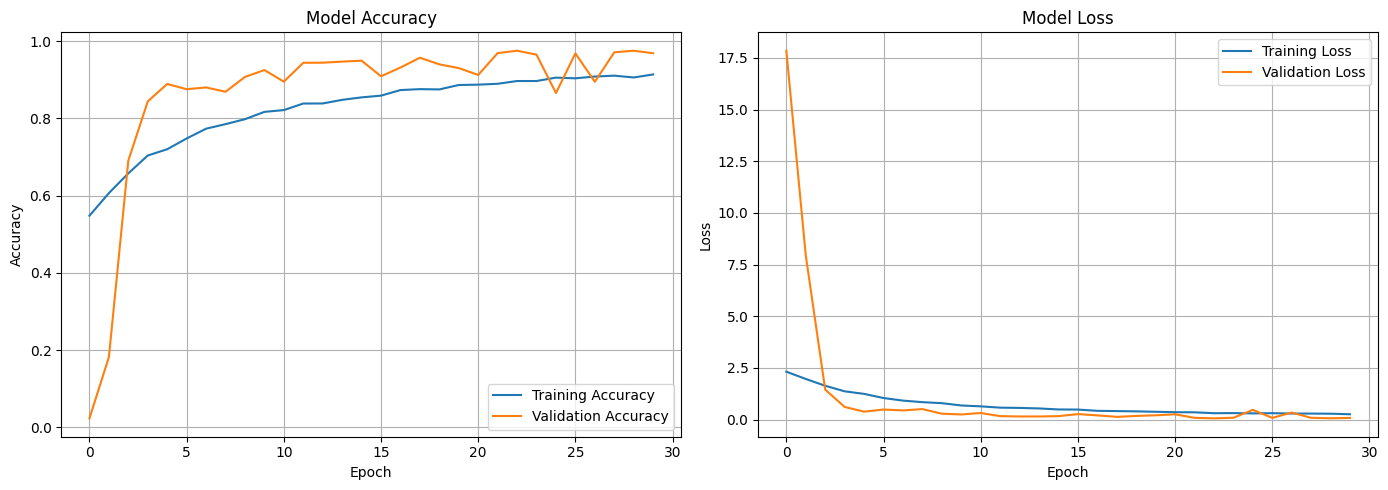

In [33]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()